### Import Libraries

In [493]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

### Load Population Dataset

In [494]:
data_p = pd.read_csv("Population.csv")
data_p.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,Aruba,ABW,"Population, total",SP.POP.TOTL,54608,55811,56682,57475,58178,58782,...,103594,104257,104874,105439,105962,106442,106585,106537,106445,NaN
1,Africa Eastern and Southern,AFE,"Population, total",SP.POP.TOTL,130692579,134169237,137835590,141630546,145605995,149742351,...,583651101,600008424,616377605,632746570,649757148,667242986,685112979,702977106,720859132,NaN
2,Afghanistan,AFG,"Population, total",SP.POP.TOTL,8622466,8790140,8969047,9157465,9355514,9565147,...,32716210,33753499,34636207,35643418,36686784,37769499,38972230,40099462,41128771,NaN
3,Africa Western and Central,AFW,"Population, total",SP.POP.TOTL,97256290,99314028,101445032,103667517,105959979,108336203,...,397855507,408690375,419778384,431138704,442646825,454306063,466189102,478185907,490330870,NaN
4,Angola,AGO,"Population, total",SP.POP.TOTL,5357195,5441333,5521400,5599827,5673199,5736582,...,27128337,28127721,29154746,30208628,31273533,32353588,33428486,34503774,35588987,NaN


### Overview

In [495]:
data_p.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264 entries, 0 to 263
Data columns (total 68 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country Name    264 non-null    object 
 1   Country Code    264 non-null    object 
 2   Indicator Name  264 non-null    object 
 3   Indicator Code  264 non-null    object 
 4   1960            264 non-null    int64  
 5   1961            264 non-null    int64  
 6   1962            264 non-null    int64  
 7   1963            264 non-null    int64  
 8   1964            264 non-null    int64  
 9   1965            264 non-null    int64  
 10  1966            264 non-null    int64  
 11  1967            264 non-null    int64  
 12  1968            264 non-null    int64  
 13  1969            264 non-null    int64  
 14  1970            264 non-null    int64  
 15  1971            264 non-null    int64  
 16  1972            264 non-null    int64  
 17  1973            264 non-null    int

### Analyze and Filter Dataset

In [496]:
print("Dimensions:", data_p.shape, end='\n\n')

print("Before Filtering Columns:", end='\n\n')
print(data_p.columns, end='\n\n')

# Drop unnecessary columns
columns_to_drop = ['Indicator Name', 'Indicator Code', 'Country Code']
data_p.drop(columns_to_drop, axis=1, inplace=True)

# Forward fill missing values
data_p = data_p.ffill()

# Remove any columns with all NaN values (if any)
data_p.dropna(axis=1, how='all', inplace=True)

print("After Filtering Columns:", end='\n\n')
print(data_p.columns)


Dimensions: (264, 68)

Before Filtering Columns:

Index(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       '1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968',
       '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977',
       '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986',
       '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995',
       '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022',
       '2023'],
      dtype='object')

After Filtering Columns:

Index(['Country Name', '1960', '1961', '1962', '1963', '1964', '1965', '1966',
       '1967', '1968', '1969', '1970', '1971', '1972', '1973', '1974', '1975',
       '1976', '1977', '1978', '1979', '1980', '1981', '1982', '1983', '1984',
       '1985', '1986

### Select Data to Plot

In [497]:
countries_to_plot = ['United States', 'Canada', 'India', 'Brazil', 'Japan', 'Germany', 'France', 'Pakistan', 'Spain']
filtered_data = data_p[data_p['Country Name'].isin(countries_to_plot)]

# Check for missing values or anomalies in the dataset
if filtered_data.isnull().values.any():
    print("Warning: Missing values found in the dataset. Please handle them appropriately.")

### Plot

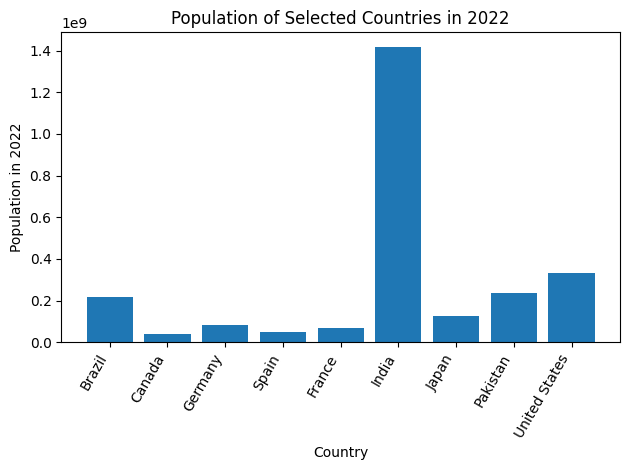

In [498]:
# Create the bar chart

plt.bar(filtered_data['Country Name'], filtered_data['2022'])
plt.xlabel('Country')
plt.ylabel('Population in 2022')
plt.title('Population of Selected Countries in 2022')
plt.xticks(rotation=60, ha='right')
plt.tight_layout()
plt.show()


### Population of Selected Country Over the Years

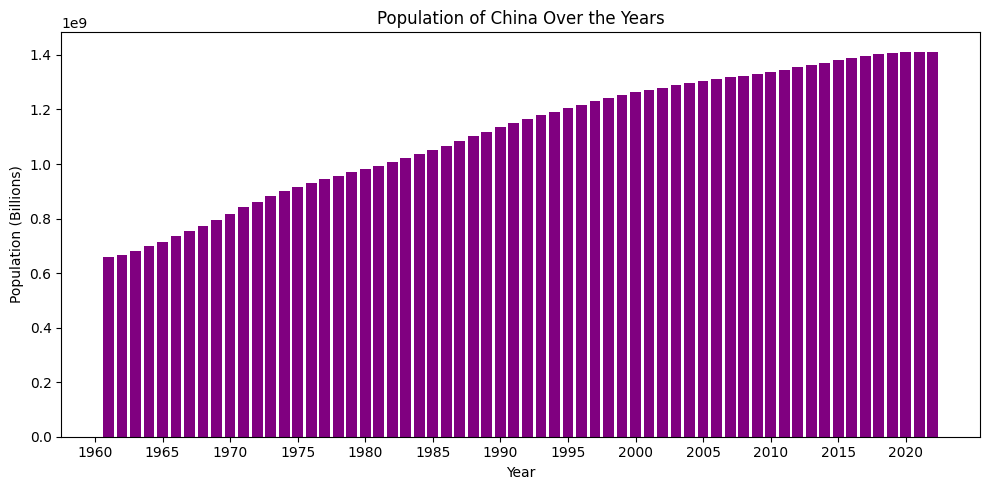

In [499]:
chosen = 'China'

# Filter data for the chosen country
country_data = data_p[data_p['Country Name'] == chosen]

# Extract years and population data
years = country_data.columns[2:].astype(int)
population = country_data.iloc[:, 2:].values.flatten()

# Generate a range of years from 1960 to 2022 with a step of 5
years_range = np.arange(1960, 2023, 5)

# Plot the bar chart
plt.figure(figsize=(10, 5))
plt.bar(years, population, color='purple')
plt.xlabel('Year')
plt.ylabel('Population (Billions)')
plt.title(f'Population of {chosen} Over the Years')

# Set x-axis ticks to display every 5 years
plt.xticks(years_range)

plt.tight_layout()
plt.show()

### Per Year Data

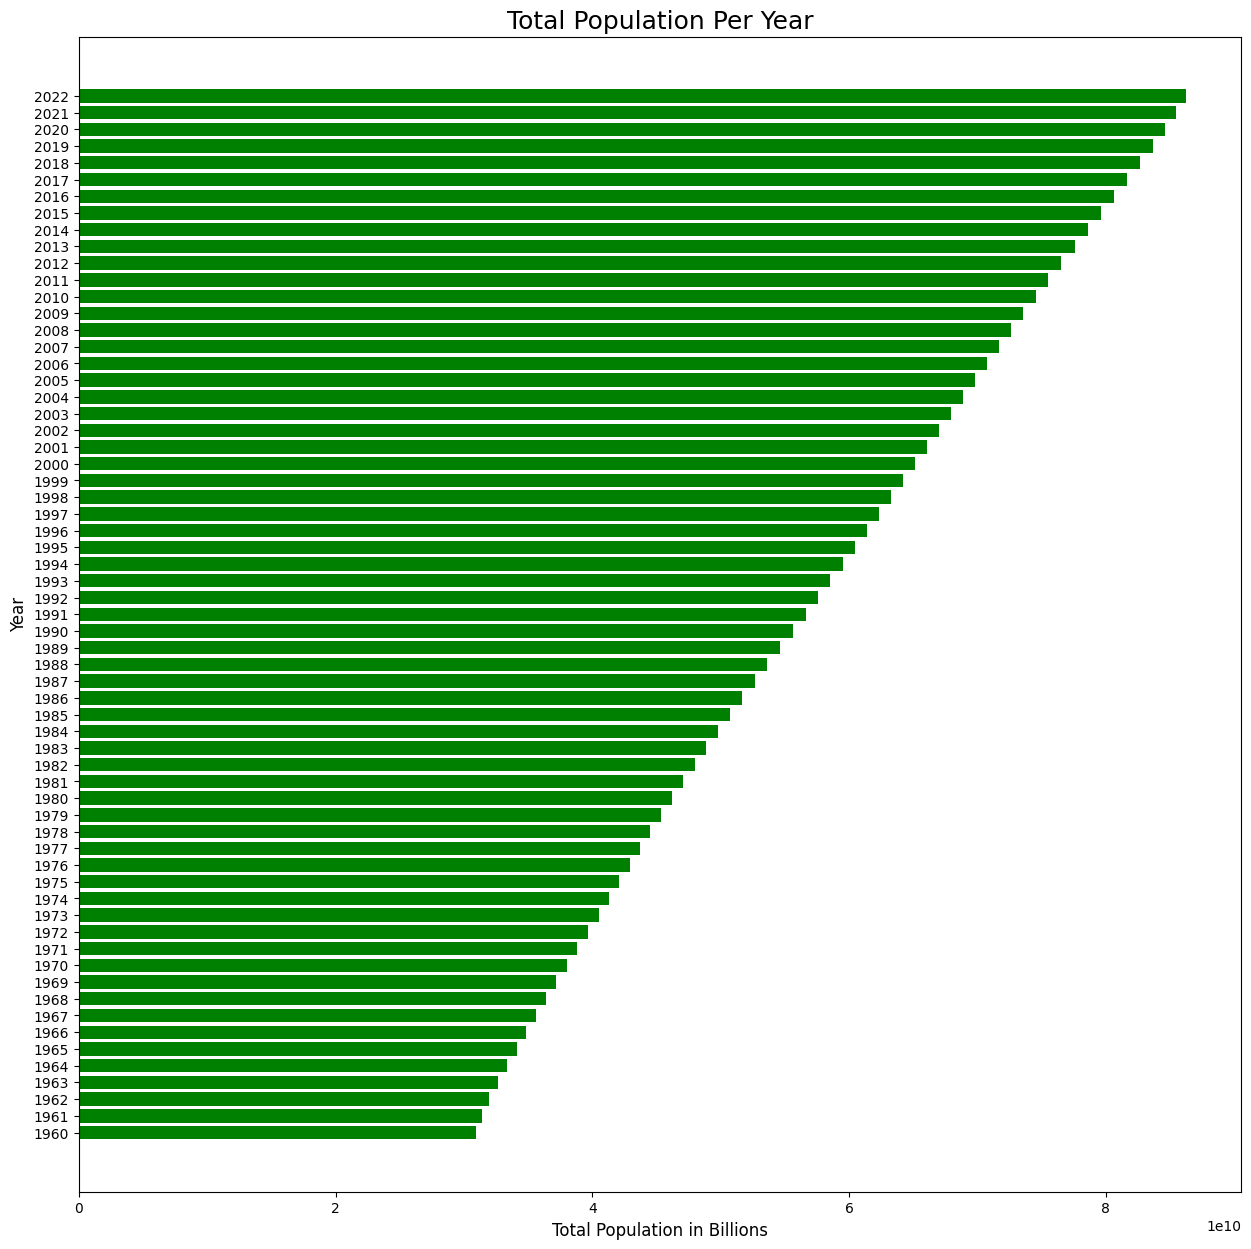

In [500]:
years = data_p.columns[1:]  

total_values = data_p[years].sum()

plt.figure(figsize=(15, 15))  
plt.barh(years, total_values, color='green')
plt.xlabel('Total Population in Billions', size=12)
plt.ylabel('Year', size=12)
plt.title('Total Population Per Year', size=18)
plt.show()

### Load Country Dataset

In [501]:
data_c = pd.read_csv("Country.csv")
data_c.head()

,Country Code,Region,IncomeGroup,SpecialNotes,TableName
0,ABW,Latin America & Caribbean,High income,NaN,Aruba
1,AFE,NaN,NaN,"26 countries, stretching from the Red Sea in t...",Africa Eastern and Southern
2,AFG,South Asia,Low income,The reporting period for national accounts dat...,Afghanistan
3,AFW,NaN,NaN,"22 countries, stretching from the westernmost ...",Africa Western and Central
4,AGO,Sub-Saharan Africa,Lower middle income,The World Bank systematically assesses the app...,Angola


### Overview

In [502]:
data_c.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 265 entries, 0 to 264
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Country Code  265 non-null    object
 1   Region        217 non-null    object
 2   IncomeGroup   216 non-null    object
 3   SpecialNotes  126 non-null    object
 4   TableName     265 non-null    object
dtypes: object(5)
memory usage: 10.5+ KB


### Plot Count of Countries in Each Region

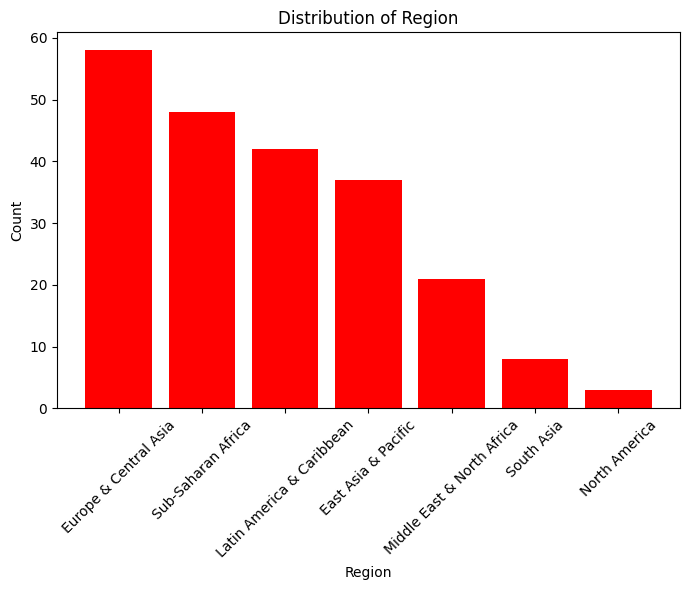

In [503]:
region = data_c['Region']
counts = region.value_counts()

plt.figure(figsize=(7,6))
plt.bar(counts.index, counts.values, color='red')
plt.xlabel('Region')
plt.ylabel('Count')
plt.title('Distribution of Region')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Distribution of Income

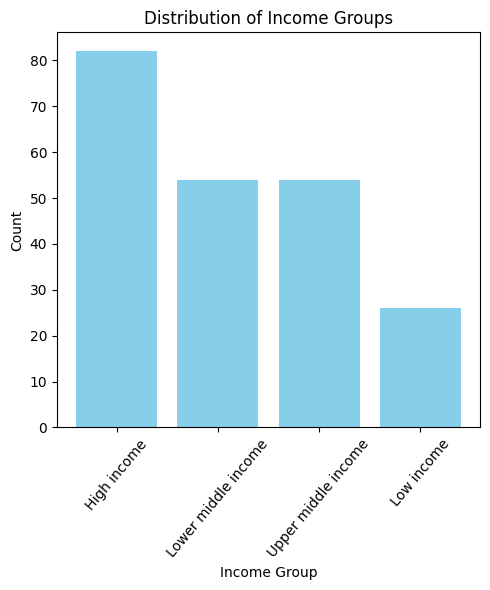

In [504]:
income_groups = data_c['IncomeGroup']

# Count the occurrences of each income group
income_group_counts = income_groups.value_counts()

# Plot a bar chart
plt.figure(figsize=(5, 6))
plt.bar(income_group_counts.index, income_group_counts.values, color='skyblue')
plt.xlabel('Income Group')
plt.ylabel('Count')
plt.title('Distribution of Income Groups')
plt.xticks(rotation=50)
plt.tight_layout()
plt.show()

### Load Dataset of Pakistan

In [505]:
data_pak = pd.read_csv("Division of Population of Pakistan.csv")
data_pak.head()

,PROVINCE,DIVISION,DISTRICT,SUB DIVISION,AREA (sq.km),ALL SEXES (RURAL),MALE (RURAL),FEMALE (RURAL),TRANSGENDER (RURAL),SEX RATIO (RURAL),...,POPULATION 1998 (RURAL),ANNUAL GROWTH RATE (RURAL),ALL SEXES (URBAN),MALE (URBAN),FEMALE (URBAN),TRANSGENDER (URBAN),SEX RATIO (URBAN),AVG HOUSEHOLD SIZE (URBAN),POPULATION 1998 (URBAN),ANNUAL GROWTH RATE (URBAN)
0,PUNJAB,BAHAWALPUR DIVISION,BAHAWALNAGAR DISTRICT,BAHAWALNAGAR TEHSIL,1729.0,619550,316864,302644,42,104.70,...,407768,2.22,193840,98391,95402,47,103.13,6.02,133785,1.97
1,PUNJAB,BAHAWALPUR DIVISION,BAHAWALNAGAR DISTRICT,CHISHTIAN TEHSIL,1500.0,540342,273788,266500,54,102.73,...,395983,1.65,149424,75546,73851,27,102.30,6.01,102287,2.01
2,PUNJAB,BAHAWALPUR DIVISION,BAHAWALNAGAR DISTRICT,FORT ABBAS TEHSIL,2536.0,361240,182655,178541,44,102.30,...,250959,1.93,61528,31360,30150,18,104.01,6.00,34637,3.06
3,PUNJAB,BAHAWALPUR DIVISION,BAHAWALNAGAR DISTRICT,HAROONABAD TEHSIL,1295.0,382115,192278,189808,29,101.30,...,297343,1.33,142600,71345,71236,19,100.15,6.02,84424,2.79
4,PUNJAB,BAHAWALPUR DIVISION,BAHAWALNAGAR DISTRICT,MINCHINABAD TEHSIL,1818.0,452723,231506,221178,39,104.67,...,316593,1.90,72294,36694,35590,10,103.10,6.34,37668,3.48


### Divide Dataset

In [506]:
# Group the data by unique values of the 'DIVISION' column and sum up the populations
division_groups = data_pak.groupby('DIVISION').agg({
    'MALE (RURAL)': 'sum',
    'MALE (URBAN)': 'sum',
    'FEMALE (RURAL)': 'sum',
    'FEMALE (URBAN)': 'sum'
})

# Calculate the total population of males and females for each division
division_groups['Total Male Population'] = division_groups['MALE (RURAL)'] + division_groups['MALE (URBAN)']
division_groups['Total Female Population'] = division_groups['FEMALE (RURAL)'] + division_groups['FEMALE (URBAN)']

### Plot

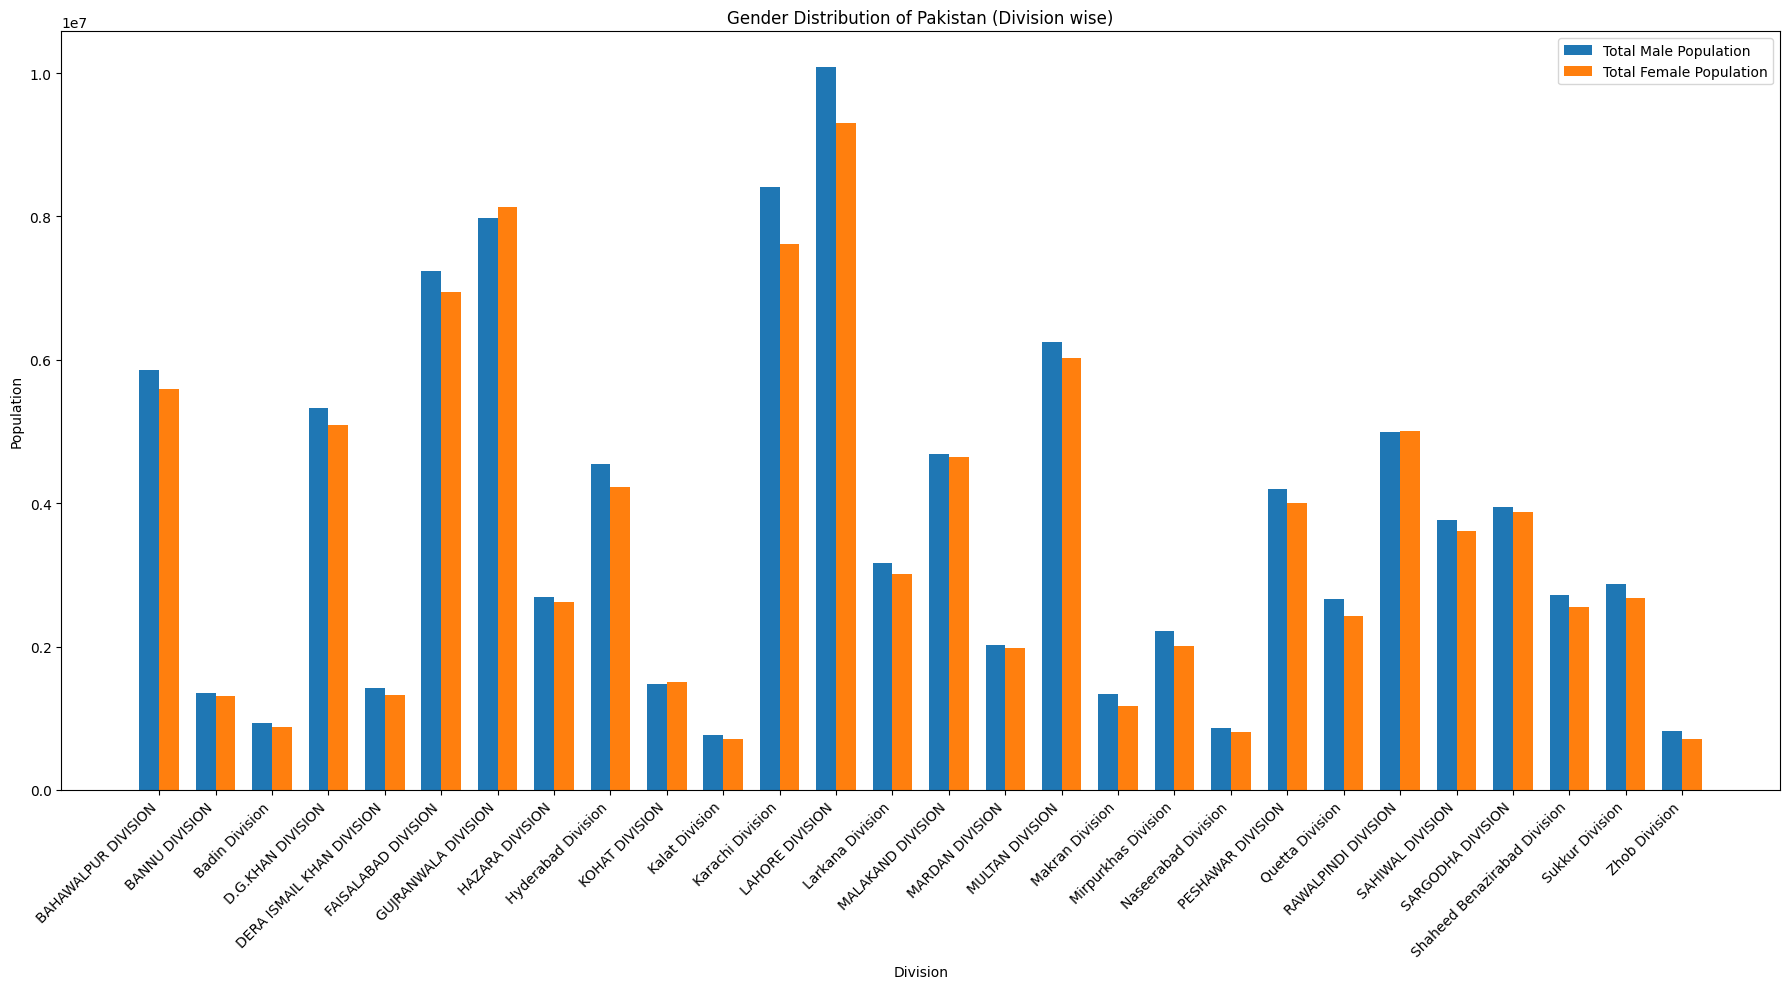

In [507]:
# Set the width of the bars
bar_width = 0.35

# Define the positions for the bars
positions = np.arange(len(division_groups.index))

# Plot the total populations of males and females for each division
plt.figure(figsize=(18, 10))
plt.bar(positions - bar_width/2, division_groups['Total Male Population'], width=bar_width, label="Total Male Population")
plt.bar(positions + bar_width/2, division_groups['Total Female Population'], width=bar_width, label="Total Female Population")

# Add labels, title, and legend
plt.xlabel('Division')
plt.ylabel('Population')
plt.title('Gender Distribution of Pakistan (Division wise)')
plt.xticks(positions, division_groups.index, rotation=45, ha='right')  # Rotate x-axis labels
plt.tight_layout()
plt.legend()

plt.show()